In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [207]:
dataset  = pd.read_csv("dataset.csv")

In [208]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [209]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [210]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [211]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [212]:
dataset.drop(columns=["id"], index=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [213]:
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Unnamed: 32    569
dtype: int64


In [214]:
dataset["diagnosis"] = dataset["diagnosis"]. apply(lambda x: 1 if x=="M" else 0)

In [215]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [216]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [217]:
dataset["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [218]:
class_0 = dataset[dataset["diagnosis"]==0]
class_1 = dataset[dataset["diagnosis"]==1]

rows_to_drop = class_0.sample(n=57, random_state=65)
rows_dropped = class_0.drop(rows_to_drop.index)

new_df = pd.concat([rows_dropped, class_1], ignore_index=True)

In [219]:
print(new_df.shape)

(512, 33)


In [220]:
new_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
1,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
2,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
3,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN
4,857155,0,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,...,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301,NaN


In [221]:
new_df["diagnosis"].value_counts()

diagnosis
0    300
1    212
Name: count, dtype: int64

In [222]:
X = new_df.iloc[:, 2:32]
Y = new_df["diagnosis"]

In [223]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         13.540         14.36           87.46      566.3          0.09779   
1         13.080         15.71           85.63      520.0          0.10750   
2         13.030         18.42           82.61      523.8          0.08983   
3          8.196         16.84           51.71      201.9          0.08600   
4         12.050         14.63           78.04      449.3          0.10310   
..           ...           ...             ...        ...              ...   
507       20.920         25.09          143.00     1347.0          0.10990   
508       21.560         22.39          142.00     1479.0          0.11100   
509       20.130         28.25          131.20     1261.0          0.09780   
510       16.600         28.08          108.30      858.1          0.08455   
511       20.600         29.33          140.10     1265.0          0.11780   

     compactness_mean  concavity_mean  concave points_mean  sym

In [224]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
507    1
508    1
509    1
510    1
511    1
Name: diagnosis, Length: 512, dtype: int64


In [225]:
print(X.shape)
print(Y.shape)

(512, 30)
(512,)


In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=43)

In [227]:
print(X_train.shape)
print(X_test.shape)

(409, 30)
(103, 30)


In [228]:
print(Y_train.shape)
print(Y_test.shape)

(409,)
(103,)


In [229]:
smote = SMOTE(random_state=43)
X_train_smoted, Y_train_smoted  = smote.fit_resample(X_train, Y_train)

In [230]:
print(X_train_smoted.shape)
print(Y_train_smoted.shape)

(478, 30)
(478,)


In [231]:
X_train_smoted.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.08795,0.2132,0.06022,...,22.93,27.68,152.20,1603.0,0.1398,0.2089,0.3157,0.16420,0.3695,0.08579
1,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.02027,0.1695,0.05916,...,14.29,24.04,93.85,624.6,0.1368,0.2170,0.2413,0.08829,0.3218,0.07470
2,13.17,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,0.1746,0.06177,...,16.23,29.89,105.50,740.7,0.1503,0.3904,0.3728,0.16070,0.3693,0.09618
3,15.70,20.31,101.20,766.6,0.09597,0.08799,0.06593,0.05189,0.1618,0.05549,...,20.11,32.82,129.30,1269.0,0.1414,0.3547,0.2902,0.15410,0.3437,0.08631
4,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,0.1954,0.07976,...,11.69,20.74,76.08,411.1,0.1662,0.2031,0.1256,0.09514,0.2780,0.11680


In [232]:
Y_train_smoted.value_counts()

diagnosis
1    239
0    239
Name: count, dtype: int64

In [233]:
X_test.shape

(103, 30)

In [234]:
Y_test.value_counts()

diagnosis
0    61
1    42
Name: count, dtype: int64

In [235]:
mm_scalar = MinMaxScaler()
X_train_transformed = mm_scalar.fit_transform(X_train_smoted)
X_test_transformed = mm_scalar.transform(X_test)

In [236]:
print(X_train_transformed)

[[0.52740095 0.2979371  0.52055769 ... 0.56426117 0.41022044 0.20059113]
 [0.22131348 0.28102807 0.21617584 ... 0.30340206 0.31462926 0.12775041]
 [0.26832852 0.40919851 0.26675203 ... 0.55223368 0.40981964 0.26883415]
 ...
 [0.81047517 0.47659842 0.83045997 ... 0.88565761 0.16873434 0.29678062]
 [0.41582605 0.23261278 0.41384909 ... 0.59326505 0.35114625 0.21371946]
 [0.47376954 0.43312459 0.4506396  ... 0.29771077 0.16524839 0.07127034]]


In [249]:
models = {
    "LR" : LogisticRegression(),
    "LDA" : LinearDiscriminantAnalysis(),
    "SVC" : SVC(probability=True),
    "DT" : DecisionTreeClassifier(),
    "NB" : GaussianNB(),
    "KNN" : KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_transformed, Y_train_smoted)
    y_pred = model.predict(X_test_transformed)
    print(y_pred)

[1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1
 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0]
[1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1
 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0]
[1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0]
[1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1
 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0]
[1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1
 0 0 0 1 0

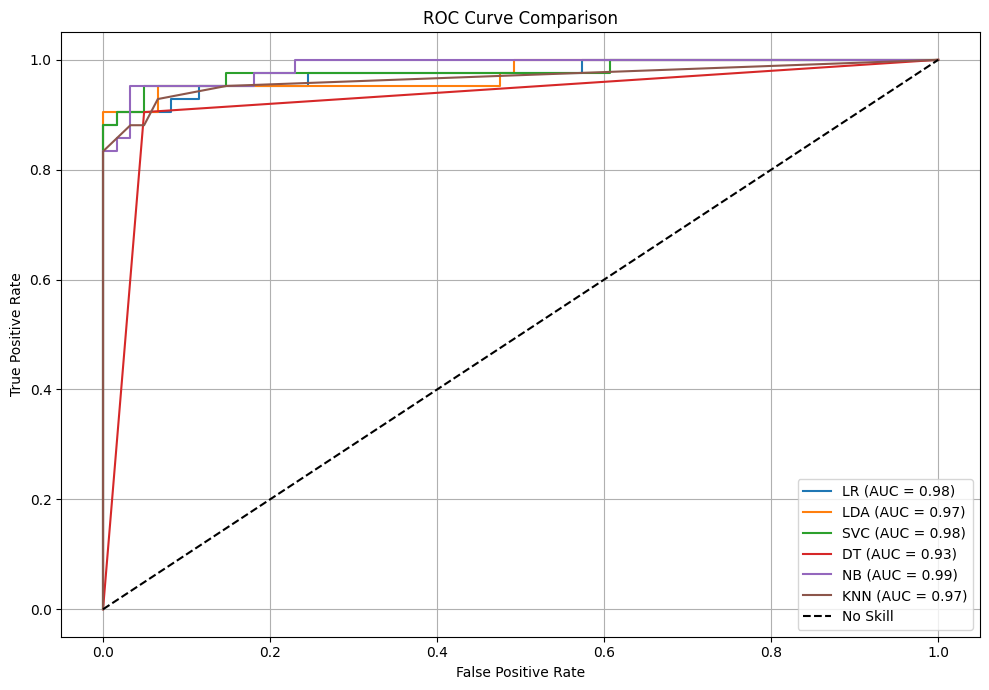

In [252]:
plt.figure(figsize=(10,7))

auc_scores = {}

for name, model in models.items():
    y_probs = model.predict_proba(X_test_transformed)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_probs)
    auc = roc_auc_score(Y_test, y_probs)
    auc_scores[name] = auc
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1], [0,1], 'k--', label='No Skill')

plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

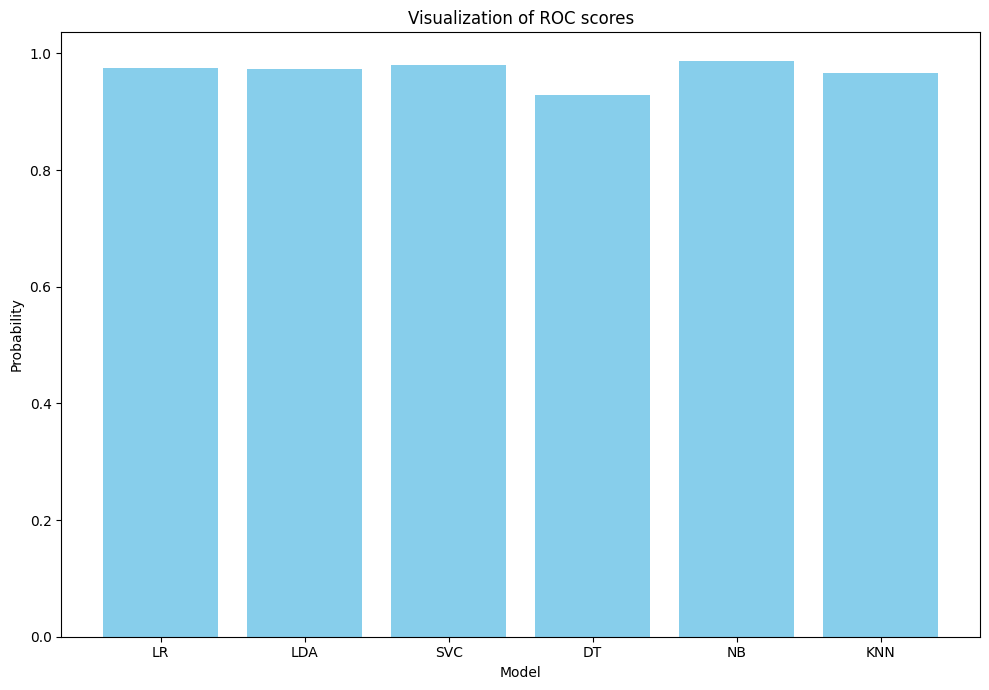

In [257]:
plt.figure(figsize=(10,7))
plt.bar(auc_scores.keys(), auc_scores.values(), color='skyblue')
plt.title("Visualization of ROC scores")
plt.xlabel("Model")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

In [239]:
for name, model in models.items():
    X_train_prediction = model.predict(X_train_transformed)
    X_train_accuracy = accuracy_score(X_train_prediction, Y_train_smoted)
    print(f'Accuracy of {name} : {X_train_accuracy}')

Accuracy of LR : 0.9790794979079498
Accuracy of LDA : 0.9748953974895398
Accuracy of SVC : 0.9853556485355649
Accuracy of DT : 1.0
Accuracy of NB : 0.9330543933054394
Accuracy of KNN : 0.9874476987447699


In [240]:
for name, model in models.items():
    X_test_prediction = model.predict(X_test_transformed)
    X_test_accuracy = accuracy_score(X_test_prediction, Y_test)
    print(f'Accuracy of {name} : {X_test_accuracy}')

Accuracy of LR : 0.9514563106796117
Accuracy of LDA : 0.9514563106796117
Accuracy of SVC : 0.941747572815534
Accuracy of DT : 0.9223300970873787
Accuracy of NB : 0.9223300970873787
Accuracy of KNN : 0.9223300970873787


In [248]:
for name, model in models.items():
    y_predictions = model.predict(X_test_transformed)
    print(f"CR of {name}")
    print(classification_report(Y_test, y_predictions))

CR of LR
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        61
           1       0.97      0.90      0.94        42

    accuracy                           0.95       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.95      0.95      0.95       103

CR of LDA
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        61
           1       1.00      0.88      0.94        42

    accuracy                           0.95       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.95      0.95       103

CR of SVC
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        61
           1       0.97      0.88      0.93        42

    accuracy                           0.94       103
   macro avg       0.95      0.93      0.94       103
weighted avg       0.94      0.94      0.94  

Model LR


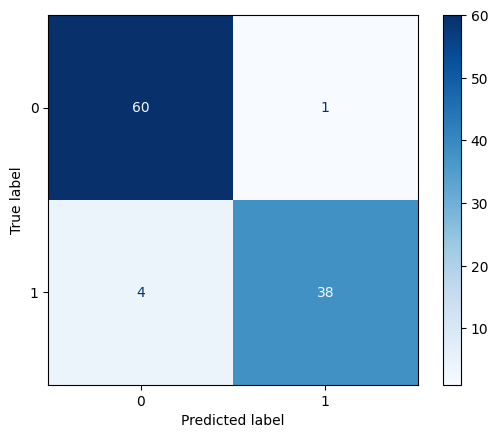

 
Model LDA


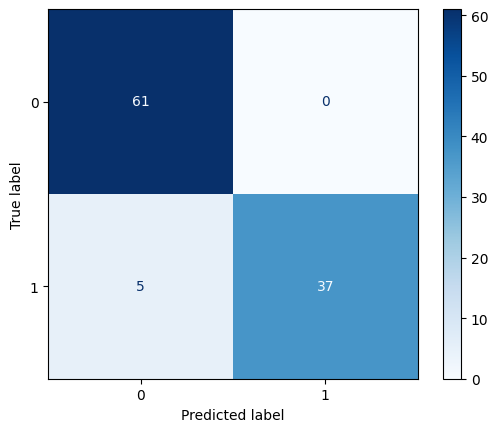

 
Model SVC


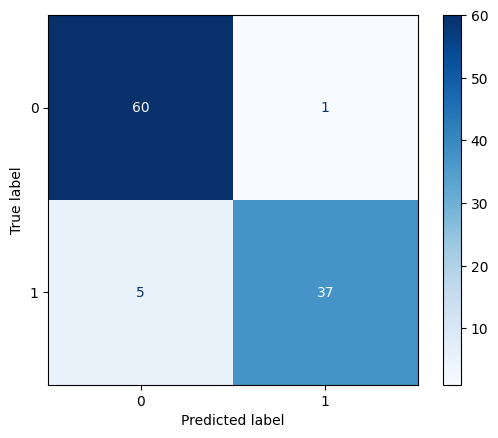

 
Model DT


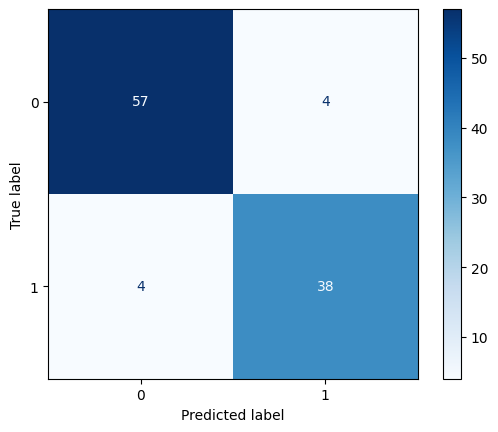

 
Model NB


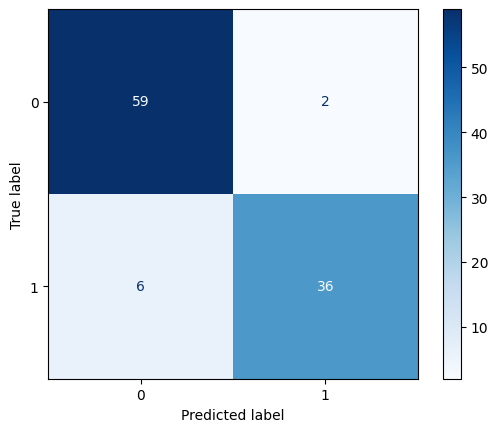

 
Model KNN


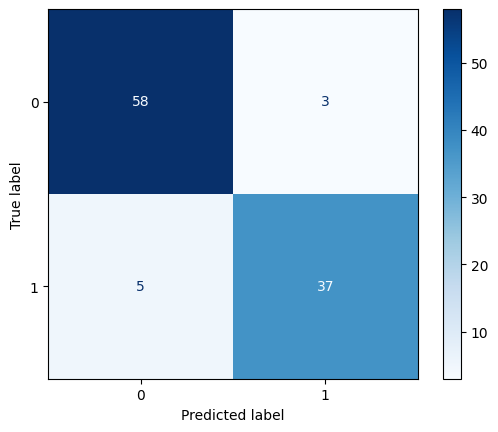

In [244]:
for name, model in models.items():
    prediction = model.predict(X_test_transformed)
    CM = confusion_matrix(Y_test, prediction)
    print(f'Model {name}')
    disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=[0,1])
    disp.plot(cmap="Blues")
    plt.show()
    print(" ")